### Full Name : 
### Student Number : 


# Support Vector Machines (SVM)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

## Goal
In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [2]:
df = pd.read_csv("Liver_Disease.csv") 

### Pre-Processing

#### Exploratory Data Analysis:
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

Dataset Shape: (583, 11)
Missing Values in Each Column:
 Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
label                         0
dtype: int64
Class Distribution:
 label
1    416
2    167
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16376\4024945641.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['label'] == 1], x='Gender', palette='Blues')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16376\4024945641.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['label'] == 2], x='Gender', palette='Reds')


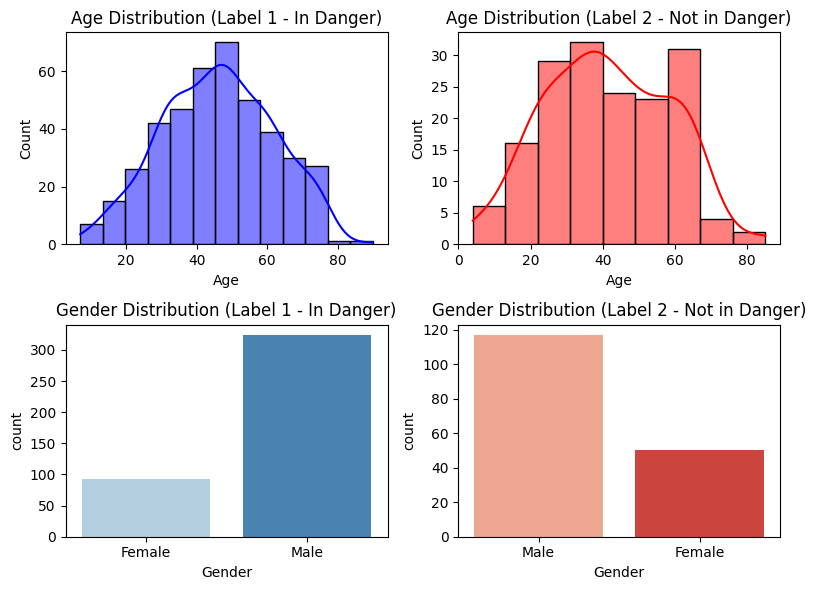

In [8]:
###############################################################################
## TODO: Find the shape of the dataset.                                      ##
###############################################################################
print("Dataset Shape:", df.shape)


###############################################################################
## TODO: Check if there is missing entries in the dataset columnwise.        ##
###############################################################################
print("Missing Values in Each Column:\n", df.isnull().sum())

###############################################################################
## TODO: Check whether the dataset is balanced or not.                       ##
###############################################################################
print("Class Distribution:\n", df['label'].value_counts())  # Assuming 'Outcome' is the label column

###############################################################################
## TODO: plot the age distirbution and gender distrbution for both group    ##
## of patients.(4 plots)                                                    ##
###############################################################################
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.histplot(df[df['label'] == 1]['Age'], kde=True, color='blue')
plt.title("Age Distribution (Label 1 - In Danger)")

plt.subplot(2, 2, 2)
sns.histplot(df[df['label'] == 2]['Age'], kde=True, color='red')
plt.title("Age Distribution (Label 2 - Not in Danger)")

plt.subplot(2, 2, 3)
sns.countplot(data=df[df['label'] == 1], x='Gender', palette='Blues')
plt.title("Gender Distribution (Label 1 - In Danger)")

plt.subplot(2, 2, 4)
sns.countplot(data=df[df['label'] == 2], x='Gender', palette='Reds')
plt.title("Gender Distribution (Label 2 - Not in Danger)")

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

##### Answer:

Age Distribution:

Both "In Danger" (label 1) and "Not in Danger" (label 2) patients have similar age distributions, with the majority of patients falling between 30 and 60 years of age.

The "In Danger" group has a larger count of patients in the middle age group (around 40 to 50 years).

The distribution for "Not in Danger" patients shows a more even spread, with slightly fewer young and elderly patients compared to the "In Danger" group.

Gender Distribution:

There are significantly more males in both groups compared to females.

In the "In Danger" group, the majority of the patients are male (more than 300 males vs. less than 100 females).

In the "Not in Danger" group, there are still more males than females, but the difference is less pronounced than in the "In Danger" group.

These plots suggest that males are more likely to appear in both "In Danger" and "Not in Danger" groups, and the age group around 40-50 seems to have more individuals at risk.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [12]:
def detect_outliers_zscore(data):
    z_scores = stats.zscore(data)
    abs_z_scores = np.abs(z_scores)
    is_outlier = (abs_z_scores > 3)
    return is_outlier

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_zscore = detect_outliers_zscore(df[numerical_columns])

df_cleaned_zscore = df[~outliers_zscore.any(axis=1)]

print(f"Dataset shape before Z-score outlier removal: {df.shape}")
print(f"Dataset shape after Z-score outlier removal: {df_cleaned_zscore.shape}")


Dataset shape before Z-score outlier removal: (583, 11)
Dataset shape after Z-score outlier removal: (538, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [15]:
################################################################################
## TODO: Normalize numerical features to be between 0 and 1                   ##
## Note that just numerical fetures should be normalized.                     ##
################################################################################
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  0.709302  Female         0.004021          0.000000              0.060576   
1  0.674419    Male         0.140751          0.275510              0.310699   
2  0.674419    Male         0.092493          0.204082              0.208598   
3  0.627907    Male         0.008043          0.015306              0.058134   
4  0.790698    Male         0.046917          0.096939              0.064485   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                  0.003015                    0.001626        0.594203   
1                  0.027136                    0.018296        0.695652   
2                  0.025126                    0.011791        0.623188   
3                  0.002010                    0.002033        0.594203   
4                  0.008543                    0.009961        0.666667   

    Albumin  Albumin_and_Globulin_Ratio  label  
0  0.521739        

In [16]:
# Additional Feature Engineering Techniques
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Albumin_Protein_Ratio'] = df['Albumin'] / df['Total_Protiens']
df['Total_Bilirubin_log'] = np.log1p(df['Total_Bilirubin'])

### SVM

#### spliting data

In [18]:
## TODO Split the data into test and training sets.
X = df.drop('label', axis=1)
y = df['label']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (466, 12)
Test data shape: (117, 12)
Training labels shape: (466,)
Test labels shape: (117,)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

I balanced the dataset

In [30]:
#########################################################################################
## TODO
#########################################################################################
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the SVM model with balanced class weights
svm_model = SVC(class_weight='balanced')

svm_model.fit(X_train_imputed, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test_imputed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.5897

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63        87
         1.0       0.38      0.93      0.54        30

    accuracy                           0.59       117
   macro avg       0.67      0.70      0.58       117
weighted avg       0.81      0.59      0.61       117



#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [34]:
#########################################################################################
## TODO
#########################################################################################
param_grid = {
    'C': [0.1, 1, 10, 100],   
    'gamma': ['scale', 'auto', 0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly']     
}

grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_imputed, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best SVM Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
Best SVM Model Accuracy: 0.6410

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.73        87
         1.0       0.37      0.57      0.45        30

    accuracy                           0.64       117
   macro avg       0.59      0.62      0.59       117
weighted avg       0.70      0.64      0.66       117



Train an svm model on the entire training data using the parameters you found in the previous step.

In [37]:
#########################################################################################
## TODO
#########################################################################################
final_svm_model = SVC(C= 100, gamma= 10, kernel= 'rbf',class_weight='balanced')

final_svm_model.fit(X_train_imputed, y_train)
y_pred_final = final_svm_model.predict(X_test_imputed)

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final SVM Model Accuracy: {final_accuracy:.4f}")

print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_final, zero_division=1))

Final SVM Model Accuracy: 0.6410

Final Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.67      0.73        87
         1.0       0.37      0.57      0.45        30

    accuracy                           0.64       117
   macro avg       0.59      0.62      0.59       117
weighted avg       0.70      0.64      0.66       117



### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

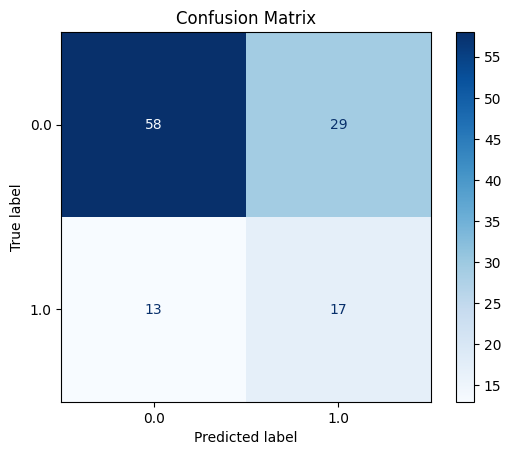

Model Accuracy on Test Set: 0.6410


In [39]:
#########################################################################################
## TODO
#########################################################################################
conf_matrix = confusion_matrix(y_test, y_pred_final)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=final_svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Model Accuracy on Test Set: {final_accuracy:.4f}")

The confusion matrix provides a summary of the prediction results on the test dataset.

True Positive (TP): Number of instances where the model correctly predicted class 1 (e.g., the patient is in danger).

True Negative (TN): Number of instances where the model correctly predicted class 0 (e.g., the patient is not in danger).

False Positive (FP): Number of instances where the model incorrectly predicted class 1 when the actual class was 0.

False Negative (FN): Number of instances where the model incorrectly predicted class 0 when the actual class was 1.

Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

In [44]:
#########################################################################################
## TODO
#########################################################################################


def introduce_outliers(X, n_outliers=10, factor=10):
    X_outliers = X.copy()
    np.random.seed(42)
    outlier_indices = np.random.choice(np.arange(X_outliers.shape[0]), size=n_outliers, replace=False)
    X_outliers[outlier_indices] += factor * np.random.normal(size=X_outliers[outlier_indices].shape)
    return X_outliers

# Introduce 5 outliers 
X_train_with_outliers = introduce_outliers(X_train_imputed, n_outliers=5, factor=10)

svm_model_with_outliers = SVC(class_weight='balanced')
svm_model_with_outliers.fit(X_train_with_outliers, y_train)
y_pred_svm = svm_model_with_outliers.predict(X_test_imputed)

log_reg_model_with_outliers = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_model_with_outliers.fit(X_train_with_outliers, y_train)
y_pred_log_reg = log_reg_model_with_outliers.predict(X_test_imputed)

SVM Accuracy: 0.5983

SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.51      0.65        87
         1.0       0.38      0.87      0.53        30

    accuracy                           0.60       117
   macro avg       0.65      0.69      0.59       117
weighted avg       0.78      0.60      0.62       117



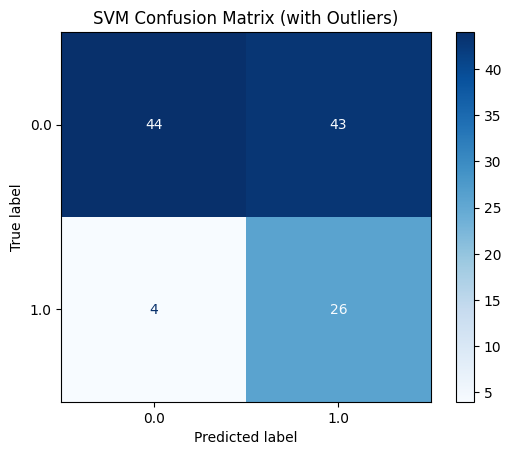

Logistic Regression Accuracy: 0.6838

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.62      0.74        87
         1.0       0.44      0.87      0.58        30

    accuracy                           0.68       117
   macro avg       0.69      0.74      0.66       117
weighted avg       0.81      0.68      0.70       117



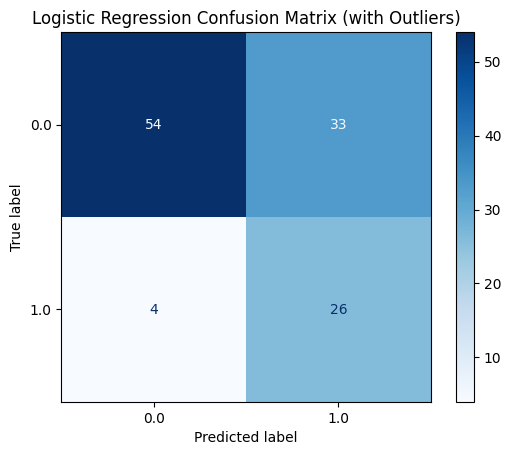

In [45]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=1))

conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm, display_labels=svm_model_with_outliers.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix (with Outliers)")
plt.show()

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, zero_division=1))

conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg, display_labels=log_reg_model_with_outliers.classes_)
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix (with Outliers)")
plt.show()

After adding 5 outliers Logestic LogisticRegression seems to work better.